## Projet Science de données
## Realisé par :
### EL ACHIQI OMAR
### OUWAB EL IDRISSI EL MEHDI

## Remarques:

### L'excecution de certain classifieur prends du temps surtout la partie de la recherche des bon hypeparametres, pour le classifieur KNN cela prend du temps afin de trouver les bon hyperparametres

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import LabelEncoder

# Preparation des données

In [2]:
df = pd.read_csv('data.csv.gz')
df

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
0,Campagne,0,342,2015,Juillet,27,1,0,0,2,...,3,ND,NaN,NaN,0,T,0.00,0,0,2015-07-01
1,Campagne,0,737,2015,Juillet,27,1,0,0,2,...,4,ND,NaN,NaN,0,T,0.00,0,0,2015-07-01
2,Campagne,0,7,2015,Juillet,27,1,0,1,1,...,0,ND,NaN,NaN,0,T,75.00,0,0,2015-07-02
3,Campagne,0,13,2015,Juillet,27,1,0,1,1,...,0,ND,304.0,NaN,0,T,75.00,0,0,2015-07-02
4,Campagne,0,14,2015,Juillet,27,1,0,2,2,...,0,ND,240.0,NaN,0,T,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Ville,0,23,2017,Aout,35,30,2,5,2,...,0,ND,394.0,NaN,0,T,96.14,0,0,2017-09-06
119386,Ville,0,102,2017,Aout,35,31,2,5,3,...,0,ND,9.0,NaN,0,T,225.43,0,2,2017-09-07
119387,Ville,0,34,2017,Aout,35,31,2,5,2,...,0,ND,9.0,NaN,0,T,157.71,0,4,2017-09-07
119388,Ville,0,109,2017,Aout,35,31,2,5,2,...,0,ND,89.0,NaN,0,T,104.40,0,0,2017-09-07


## Cette partie est dédiée a la preparation des données, s'il ya des cases vides et à l'encodage des valeurs de type object en des valeurs catégorielles 

In [3]:
df.dtypes

a0      object
a1       int64
a2       int64
a3       int64
a4      object
a5       int64
a6       int64
a7       int64
a8       int64
a9       int64
a10    float64
a11      int64
a12     object
a13     object
a14     object
a15     object
a16      int64
a17      int64
a18      int64
a19     object
a20     object
a21      int64
a22     object
a23    float64
a24    float64
a25      int64
a26     object
a27    float64
a28      int64
a29      int64
a30     object
dtype: object

**On remarque que plusieurs variables dont les valuers sont de types object ce qui va creér des problemes au niveau de la classification, pour cela nous avons decider d'encoder les valeurs des colonnes de type object
Pour cela on choisit d'utiliser LabelEncoder**

In [4]:
df1 = df.copy()

### Valeurs manquantes

In [5]:
#Frequence des valeurs manquantes
(df1.isnull().sum()/len(df1.axes[0]))*100

a0      0.000000
a1      0.000000
a2      0.000000
a3      0.000000
a4      0.000000
a5      0.000000
a6      0.000000
a7      0.000000
a8      0.000000
a9      0.000000
a10     0.003350
a11     0.000000
a12     0.000000
a13     0.408744
a14     0.000000
a15     0.000000
a16     0.000000
a17     0.000000
a18     0.000000
a19     0.000000
a20     0.000000
a21     0.000000
a22     0.000000
a23    13.686238
a24    94.306893
a25     0.000000
a26     0.000000
a27     0.000000
a28     0.000000
a29     0.000000
a30     0.000000
dtype: float64

**On constate que plusieurs données sont manquantes notamnet au niveau des variables a10 a13 a23 et a24 que Nous avons choisi de remplacer chaque valeur nulle ou manquantes par la moyenne de la colonne dont elle appartient**


### 1- Encodage des valeurs des colonnes de type object

In [6]:
string_obj_col = ['a12','a13','a14','a15','a19','a20','a0','a4','a22','a26','a30']
label_encoder = LabelEncoder()
for c in string_obj_col:
    df1[c] = label_encoder.fit_transform(df1[c])

In [7]:
df1

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
0,0,0,342,2015,5,27,1,0,0,2,...,3,0,NaN,NaN,0,2,0.00,0,0,121
1,0,0,737,2015,5,27,1,0,0,2,...,4,0,NaN,NaN,0,2,0.00,0,0,121
2,0,0,7,2015,5,27,1,0,1,1,...,0,0,NaN,NaN,0,2,75.00,0,0,122
3,0,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,NaN,0,2,75.00,0,0,122
4,0,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,NaN,0,2,98.00,0,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,0,35,30,2,5,2,...,0,0,394.0,NaN,0,2,96.14,0,0,919
119386,1,0,102,2017,0,35,31,2,5,3,...,0,0,9.0,NaN,0,2,225.43,0,2,920
119387,1,0,34,2017,0,35,31,2,5,2,...,0,0,9.0,NaN,0,2,157.71,0,4,920
119388,1,0,109,2017,0,35,31,2,5,2,...,0,0,89.0,NaN,0,2,104.40,0,0,920


In [8]:
df1['a26'].value_counts()

2    89613
3    25124
0     4076
1      577
Name: a26, dtype: int64

### 2- Traitement des colloones qui contiennent des valeurs null . 

**Il ya plusieurs methodes afin de gerer les collones contenants des valeurs manquantes, certes on decider de les remplacer par la moyennes de la collones dont elle appartient**

In [9]:
# Les colonnes a10 , a13 , a23 et a24 contiennent des valeurs null . Nous avons choisi de remplacer chaque valeur nulle par la moyenne de la colonne dont elle appartient
columns_na = ['a13', 'a10','a23','a24']
for c in columns_na:
    mean = df1[c].mean()
    df1[c] = df1[c].fillna(mean)


In [10]:
df1

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
0,0,0,342,2015,5,27,1,0,0,2,...,3,0,86.693382,189.266735,0,2,0.00,0,0,121
1,0,0,737,2015,5,27,1,0,0,2,...,4,0,86.693382,189.266735,0,2,0.00,0,0,121
2,0,0,7,2015,5,27,1,0,1,1,...,0,0,86.693382,189.266735,0,2,75.00,0,0,122
3,0,0,13,2015,5,27,1,0,1,1,...,0,0,304.000000,189.266735,0,2,75.00,0,0,122
4,0,0,14,2015,5,27,1,0,2,2,...,0,0,240.000000,189.266735,0,2,98.00,0,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,0,35,30,2,5,2,...,0,0,394.000000,189.266735,0,2,96.14,0,0,919
119386,1,0,102,2017,0,35,31,2,5,3,...,0,0,9.000000,189.266735,0,2,225.43,0,2,920
119387,1,0,34,2017,0,35,31,2,5,2,...,0,0,9.000000,189.266735,0,2,157.71,0,4,920
119388,1,0,109,2017,0,35,31,2,5,2,...,0,0,89.000000,189.266735,0,2,104.40,0,0,920


In [11]:
(df1.isnull().sum()/len(df1.axes[0]))*100

a0     0.0
a1     0.0
a2     0.0
a3     0.0
a4     0.0
a5     0.0
a6     0.0
a7     0.0
a8     0.0
a9     0.0
a10    0.0
a11    0.0
a12    0.0
a13    0.0
a14    0.0
a15    0.0
a16    0.0
a17    0.0
a18    0.0
a19    0.0
a20    0.0
a21    0.0
a22    0.0
a23    0.0
a24    0.0
a25    0.0
a26    0.0
a27    0.0
a28    0.0
a29    0.0
a30    0.0
dtype: float64

**Apres traitement on remarque que toutes les collones sont bien remplis et il n y a aucune valeurs manquantes**

In [12]:
df1.describe()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.664461,0.370416,104.011416,2016.156554,5.450465,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.221124,0.124893,86.693382,189.266735,2.321149,2.137323,101.831122,0.062518,0.571363,516.750147
std,0.472181,0.482918,106.863097,0.707476,3.558230,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.652306,0.334678,102.915247,31.411012,17.594721,0.577040,50.535790,0.245291,0.792798,227.476419
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,9.000000,189.266735,0.000000,2.000000,69.290000,0.000000,0.000000,336.000000
50%,1.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,28.000000,189.266735,0.000000,2.000000,94.575000,0.000000,0.000000,524.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,152.000000,189.266735,0.000000,2.000000,126.000000,0.000000,1.000000,709.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,21.000000,2.000000,535.000000,543.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,925.000000


**D'après les statistiques descriptives de nos données , on peut remarquer que ces derniers sont biaisées. ('a0': mean=0.66, 'a3': mean=2016)**
**Donc on doit utiliser le Data Scaling sur nos données afin d'éviter qu'un attribut domine sur un autre lors de la phase d'apprentissage. Surtout si on utilise le classifieur KNN avec le calcul de la distance euclidienne.** 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(df1)

MinMaxScaler()

In [15]:
scaled_data = pd.DataFrame(data = scaler.transform(df1), columns = df1.columns , index = df1.index)

In [16]:
scaled_data.describe()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.664461,0.370416,0.141128,0.578277,0.495497,0.503176,0.493275,0.048821,0.050006,0.033753,...,0.010530,0.062447,0.160474,0.341279,0.005936,0.712441,0.020015,0.007815,0.114273,0.558649
std,0.472181,0.482918,0.144997,0.353738,0.323475,0.261637,0.292694,0.052559,0.038166,0.010532,...,0.031062,0.167339,0.192725,0.058494,0.044999,0.192347,0.009347,0.030661,0.158560,0.245920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.024423,0.500000,0.181818,0.288462,0.233333,0.000000,0.020000,0.036364,...,0.000000,0.000000,0.014981,0.341279,0.000000,0.666667,0.013996,0.000000,0.000000,0.363243
50%,1.000000,0.000000,0.093623,0.500000,0.545455,0.519231,0.500000,0.052632,0.040000,0.036364,...,0.000000,0.000000,0.050562,0.341279,0.000000,0.666667,0.018673,0.000000,0.000000,0.566486
75%,1.000000,1.000000,0.217096,1.000000,0.727273,0.711538,0.733333,0.105263,0.060000,0.036364,...,0.000000,0.000000,0.282772,0.341279,0.000000,0.666667,0.024486,0.000000,0.200000,0.766486
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Annalyse de la variable a1

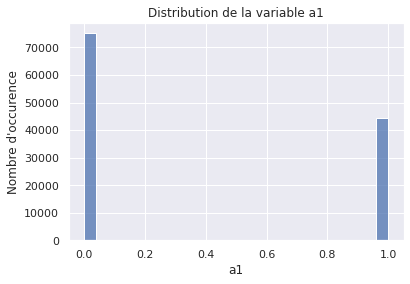

In [17]:
plt.title("Distribution de la variable a1")
plt.ylabel("Nombre d'occurence")
plt.xlabel("a1")
sns.histplot(scaled_data['a1'])
plt.show()

**On remarque que la classe 0 est plus frequente que la classe 1**

### Annalyse si on des variables avec une correlation très fortes

In [18]:
cor_matrix = scaled_data.corr().abs()

In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


**On remarque que le taux de correlation ne depasse pas 0.95 pour toutes les collones de notre dataframe donc on va rien enlever des features**

# First part : Prediction de  a1

In [20]:
cp_col = scaled_data.columns
cp_col = cp_col.delete(1)

In [21]:
X , y = scaled_data.loc[:,cp_col] , scaled_data['a1']
X

,a0,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
0,0.0,0.464043,0.0,0.454545,0.500000,0.000000,0.000000,0.00,0.036364,0.0,...,0.142857,0.0,0.160474,0.341279,0.0,0.666667,0.001180,0.0,0.0,0.130811
1,0.0,1.000000,0.0,0.454545,0.500000,0.000000,0.000000,0.00,0.036364,0.0,...,0.190476,0.0,0.160474,0.341279,0.0,0.666667,0.001180,0.0,0.0,0.130811
2,0.0,0.009498,0.0,0.454545,0.500000,0.000000,0.000000,0.02,0.018182,0.0,...,0.000000,0.0,0.160474,0.341279,0.0,0.666667,0.015053,0.0,0.0,0.131892
3,0.0,0.017639,0.0,0.454545,0.500000,0.000000,0.000000,0.02,0.018182,0.0,...,0.000000,0.0,0.567416,0.341279,0.0,0.666667,0.015053,0.0,0.0,0.131892
4,0.0,0.018996,0.0,0.454545,0.500000,0.000000,0.000000,0.04,0.036364,0.0,...,0.000000,0.0,0.447566,0.341279,0.0,0.666667,0.019307,0.0,0.2,0.132973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.0,0.031208,1.0,0.000000,0.653846,0.966667,0.105263,0.10,0.036364,0.0,...,0.000000,0.0,0.735955,0.341279,0.0,0.666667,0.018963,0.0,0.0,0.993514
119386,1.0,0.138399,1.0,0.000000,0.653846,1.000000,0.105263,0.10,0.054545,0.0,...,0.000000,0.0,0.014981,0.341279,0.0,0.666667,0.042877,0.0,0.4,0.994595
119387,1.0,0.046133,1.0,0.000000,0.653846,1.000000,0.105263,0.10,0.036364,0.0,...,0.000000,0.0,0.014981,0.341279,0.0,0.666667,0.030351,0.0,0.8,0.994595
119388,1.0,0.147897,1.0,0.000000,0.653846,1.000000,0.105263,0.10,0.036364,0.0,...,0.000000,0.0,0.164794,0.341279,0.0,0.666667,0.020491,0.0,0.0,0.994595


In [22]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: a1, Length: 119390, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

### Preparation de l'echantillon train et test

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33)

In [25]:
X_train.shape

(79991, 30)

### Importation et initialisation des classifieurs a mettre en place

In [26]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [27]:
dtc = tree.DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
sgd = SGDClassifier()
lr = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
per = Perceptron(random_state=0)
methods = [gnb, dtc, sgd, knn, lr, rfc,per]


In [28]:
X_train , y_train = X_train.to_numpy() , y_train.to_numpy()

In [29]:
X_train.shape

(79991, 30)

### Report du temps d’exécution pour l’apprentissage et l’application des modèles

In [30]:
import random
from tqdm import tqdm
sizes = list(range(1000, 20000, 1000)) 

all_times0 = []
#scores = dict()
for clf in tqdm(methods):
    temps = []
#    scores[clf.__class__.__name__] = []
    for s in sizes : 
        X_train_s , y_train_s = np.array(random.choices(X_train , k=s)) , np.array(random.choices(y_train , k=s))
        res = %timeit -o -q -r1 -n1 clf.fit(X_train_s,y_train_s)
#        scores[clf.__class__.__name__].append(clf.score())
        l = clf.__class__.__name__
        temps.append(res.average)
    all_times0.append((temps,l))

100%|██████████| 7/7 [00:35<00:00,  5.11s/it]


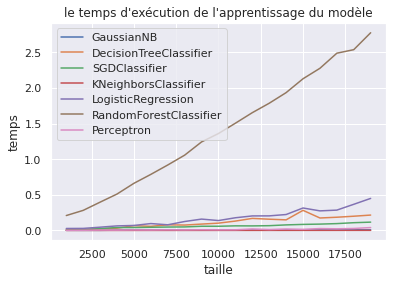

In [31]:
for times in all_times0:
    tmp, lab = times
    plt.plot(sizes,tmp, label=lab)

plt.title("le temps d'exécution de l'apprentissage du modèle")
plt.xlabel('taille')
plt.ylabel('temps')
plt.legend()
plt.show()

**On remarque que le temps de l'entrainement du classifieur RandomForestClassifier est un peu trop elevé comparativement avec les autres classifieur, ce qui est normal vue que l'algoritme doit créer un nombre très grand d'arbres .**

In [32]:
X_test , y_test = X_test.to_numpy() , y_test.to_numpy()

In [33]:
from tqdm import tqdm

all_times1 = []

for clf in tqdm(methods):
    temps = []   
    for s in sizes :
        X_test_s  = np.array(random.choices(X_test , k=s)) 
        res = %timeit -o -q -r1 -n1 clf.predict(X_test_s)
        l = clf.__class__.__name__
        temps.append(res.average)
    all_times1.append((temps, l))

100%|██████████| 7/7 [01:16<00:00, 10.98s/it]


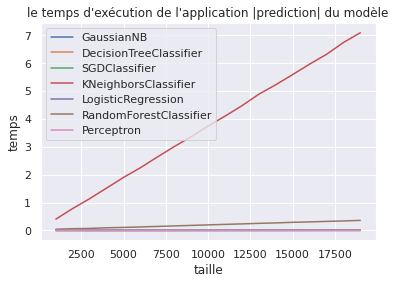

In [34]:
for times in all_times1:
    tmp, lab = times
    plt.plot(sizes,tmp, label=lab)

plt.title("le temps d'exécution de l'application |prediction| du modèle")
plt.xlabel('taille')
plt.ylabel('temps')
plt.legend()
plt.show()

***On remarque que le temps de prédiction du classifieur KNN est un peu trop elevé comparativement avec les autres classifieur, ce qui est normal vue que l'algoritme doit trouver les voisins les plus proches dans l'ensemble d'apprentissage et vue que notre echantillon a plusieurs caracteristique (dimensionnalité) le knn mets du temps***

## Hyperparameters tuning with HalvingGridSearchCV

**On a opter pour HalvingGridSearchCV apres utilisation de GridSearchCV, certes cette derniere prend beaucoup de temps afin de renvoyer le resultats, pour cela apres plusieurs recherche on a trouver que HalvingGridSearchCV est capable de trouver des combinaisons de paramètres aussi précises que GridSearchCV, en beaucoup moins de temps.**

In [35]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

### Perceptron

In [36]:
params_per = {
    'penalty' : ['l2','l1','elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1 ],
    'fit_intercept': [False,True],
    'shuffle' : [True,False],
}
halving_per = HalvingGridSearchCV(per, params_per, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halving_per.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Perceptron(), n_jobs=-1,
                    param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                'fit_intercept': [False, True],
                                'penalty': ['l2', 'l1', 'elasticnet'],
                                'shuffle': [True, False]},
                    refit=<function _refit_callable at 0x7f13db39bb70>,
                    scoring='roc_auc')

In [37]:
halving_per.best_params_

{'alpha': 0.0001, 'fit_intercept': True, 'penalty': 'l1', 'shuffle': True}

In [38]:
halving_per.best_score_

0.9825839236980057

#### Desicion tree Classifier

In [39]:
params = {'max_depth': range(2,35), 'criterion': ["gini", "entropy"], 'max_features': range(1,31)}
halving_dtc = HalvingGridSearchCV(dtc, params, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halving_dtc.fit(X_train, y_train)

HalvingGridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': range(2, 35),
                                'max_features': range(1, 31)},
                    refit=<function _refit_callable at 0x7f13db39bb70>,
                    scoring='roc_auc')

In [40]:
# Sélection des bons hyperparamètres de DecisionTreeClassifier
halving_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 15}

In [41]:
# Return the performance metric score
halving_dtc.best_score_

0.9211245930948231

### NaiveBayes

In [42]:
# Bayes Classifier
params_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [43]:
halving_gnb = HalvingGridSearchCV(gnb, params_gnb, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halving_gnb.fit(X_train, y_train)

HalvingGridSearchCV(estimator=GaussianNB(), n_jobs=-1,
                    param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                    refit=<function _refit_callable at 0x7f13db39bb70>,
                    scoring='roc_auc')

In [44]:
halving_gnb.best_params_

{'var_smoothing': 2.848035868435799e-05}

In [45]:
halving_gnb.best_score_

0.7978938419594723

### Logistic Régression

In [46]:
params_lr = {'solver' :['lbfgs','newton-cg','liblinear','sag','saga'], 'penalty' : ['l2'] , 'C' : [100, 10, 1.0, 0.1, 0.01]}

In [47]:
halving_lr = HalvingGridSearchCV(lr, param_grid=params_lr, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halving_lr.fit(X_train, y_train)

HalvingGridSearchCV(estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
                    param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                                'penalty': ['l2'],
                                'solver': ['lbfgs', 'newton-cg', 'liblinear',
                                           'sag', 'saga']},
                    refit=<function _refit_callable at 0x7f13db39bb70>,
                    scoring='roc_auc')

In [48]:
halving_lr.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [49]:
halving_lr.best_score_

0.9888002797033607

### KNeighborsClassifier

In [50]:
params_knn = {'n_neighbors' : range(1, 21, 2) , 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'minkowski']}

In [51]:
halving_knn = HalvingGridSearchCV(knn, param_grid=params_knn,   min_resources="exhaust", factor=3)
halving_knn.fit(X_train, y_train)

HalvingGridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={'metric': ['euclidean', 'manhattan',
                                           'minkowski'],
                                'n_neighbors': range(1, 21, 2),
                                'weights': ['uniform', 'distance']},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [52]:
halving_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [53]:
halving_knn.best_score_

0.8843581019343649

### SGDClassifier

In [54]:
params_sgd = {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l2', 'l1', 'elasticnet'],
              'learning_rate' : ['constant','optimal','invscaling','adaptive'],
              'alpha' : np.logspace(-4,4, num=8) , 'eta0' : [0.0001]
             }

In [55]:
halving_sgd = HalvingGridSearchCV(sgd, param_grid=params_sgd, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halving_sgd.fit(X_train, y_train)

HalvingGridSearchCV(estimator=SGDClassifier(), n_jobs=-1,
                    param_grid={'alpha': array([1.00000000e-04, 1.38949549e-03, 1.93069773e-02, 2.68269580e-01,
       3.72759372e+00, 5.17947468e+01, 7.19685673e+02, 1.00000000e+04]),
                                'eta0': [0.0001],
                                'learning_rate': ['constant', 'optimal',
                                                  'invscaling', 'adaptive'],
                                'loss': ['hinge', 'log', 'modified_huber',
                                         'squared_hinge', 'perceptron'],
                                'penalty': ['l2', 'l1', 'elasticnet']},
                    refit=<function _refit_callable at 0x7f13db39bb70>,
                    scoring='roc_auc')

In [56]:
halving_sgd.best_params_

{'alpha': 0.0001,
 'eta0': 0.0001,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'penalty': 'l1'}

In [57]:
halving_sgd.best_score_

0.9869681571579028

## Estimation de l'erreur (Géneralisation)

***Afin d'estimer l'erreur en general, il faut decouper l'echantillon de données train initial en une partie d'apprentissage (train) et une partie de validation valid, et on estime l'erreur sur la partie validation***

In [58]:
from sklearn.model_selection import KFold
kf = KFold(3)

In [59]:
res={}
for methode in methods:
    for train_idx, test_idx in kf.split(X_train):
        methode.fit(X_train[train_idx],y_train[train_idx])
        res[methode] = np.average(methode.score(X_train[test_idx],y_train[test_idx]))
for elt in res.keys():
    print("modele : ",elt.__class__.__name__,"scores : ", res[elt])

modele :  GaussianNB scores :  0.49416794809286274
modele :  DecisionTreeClassifier scores :  0.9234144694895549
modele :  SGDClassifier scores :  0.8815962194801785
modele :  KNeighborsClassifier scores :  0.8406030829239021
modele :  LogisticRegression scores :  0.9077373138806586
modele :  RandomForestClassifier scores :  0.9347785320481566
modele :  Perceptron scores :  0.809398792333946


In [60]:
a=list(res.values())
max(a)
methods

[GaussianNB(),
 DecisionTreeClassifier(),
 SGDClassifier(),
 KNeighborsClassifier(),
 LogisticRegression(max_iter=10000),
 RandomForestClassifier(),
 Perceptron()]



**On remarque que RandomForestClassifier et LogisticRegression qui ont le score le plus elevé donc si on veut choisir lequelle des classifieurs a mettre en place en production on va opter pour un de ces deux classifieur vue que leurs comportement est bel et bien meilleur que les autres dans notre echantillon a predir, le choix entre ces deux modeles peut se faire en optant pour celui le plus rapide en terme d'excecution**

## Etudes des performances en fonction de la taille des données

In [61]:
scores = dict()
for clf in tqdm(methods):
    l = clf.__class__.__name__
    scores[l] = []
    for s in sizes :
        X_test_s , y_test_s = X_test[:s+1], y_test[:s+1] 
        s = clf.score(X_test_s,y_test_s)
        scores[l].append(s)

100%|██████████| 7/7 [03:09<00:00, 27.02s/it]


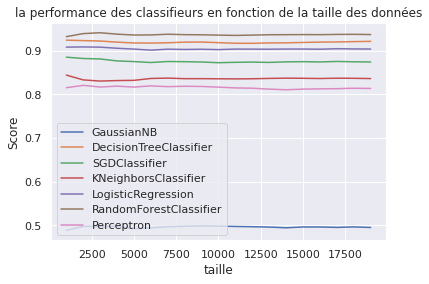

In [62]:
for s in scores:
    tmp, lab = scores[s] ,s
    plt.plot(sizes,tmp, label=lab)

plt.title("la performance des classifieurs en fonction de la taille des données")
plt.xlabel('taille')
plt.ylabel('Score')
plt.legend()
plt.show()

### On remarque que pour certains classifieurs , plus les données sont grandes plus la performance augmente , pour d'autres , plus les données augmentent , la performance diminue . On peut conclure , à partir de cela qu'on ne peut pas décider de la performance d'un classifieur en fonction de la taille des données.  Donc on peut conclure que ça dépend de la nature de l'application sur laquelle on travaille.

## Features selection

### Première méthode de sélection : Matrice de correlation 

In [63]:
corr = X.corr()

In [64]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

In [65]:
arr_columns = []
for c in columns:
    if c:
        arr_columns.append(c)
arr_columns

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [66]:
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [67]:
selected_columns = X.columns[columns]
selected_columns 

Index(['a0', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11',
       'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a21', 'a22',
       'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29'],
      dtype='object')

### Quand deux attributs ont une corrélation supérieure à 0.8 on peut garder qu'un seul des deux attributs afin de réduire la dimension de nos données. Cette méthode malheureusement ne nous permettra pas de réduire la dimension de nos données vu que la matrice de corrélation ne donne pas plusieurs attributs qui sont fortement corrélés.

### Deuxième méthode de sélection : mutual_info_classif

### Cette méthode permet de savoir si on peut construire une connexion mesurable entre chaque attribut et la cible.
### Cette méthode se base sur la formule suivante :  MI(feature;target) = Entropy(feature) - Entropy(feature|target)

In [68]:
from sklearn.feature_selection import mutual_info_classif

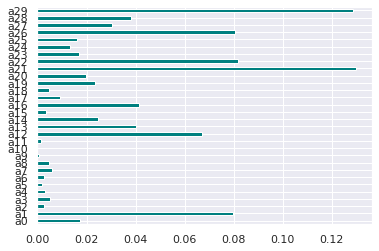

In [69]:
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [70]:
feat_importances = feat_importances.drop("a1")

In [71]:
feat_importances

a0     0.017288
a2     0.002815
a3     0.005062
a4     0.002902
a5     0.001899
a6     0.002549
a7     0.005900
a8     0.004651
a9     0.000724
a10    0.000000
a11    0.001513
a12    0.067138
a13    0.040212
a14    0.024724
a15    0.003480
a16    0.041336
a17    0.009234
a18    0.004587
a19    0.023508
a20    0.019819
a21    0.130013
a22    0.081873
a23    0.017083
a24    0.013120
a25    0.016260
a26    0.080474
a27    0.030438
a28    0.038034
a29    0.128512
dtype: float64

In [72]:
dic_feat = feat_importances.to_dict()
dic_feat

{'a0': 0.017288228925906646,
 'a2': 0.002814567198978324,
 'a3': 0.005061904636143089,
 'a4': 0.0029017045701265065,
 'a5': 0.0018994534915224293,
 'a6': 0.0025491209779990864,
 'a7': 0.005899807012617497,
 'a8': 0.00465131932831242,
 'a9': 0.000723929369446763,
 'a10': 0.0,
 'a11': 0.0015125284953425577,
 'a12': 0.06713775622927565,
 'a13': 0.040212376835082386,
 'a14': 0.02472352560345903,
 'a15': 0.0034804908207197727,
 'a16': 0.04133609942834915,
 'a17': 0.009233545440852753,
 'a18': 0.004586820045959561,
 'a19': 0.02350847088385044,
 'a20': 0.01981913683170311,
 'a21': 0.13001265216587754,
 'a22': 0.081872746797792,
 'a23': 0.01708303664232047,
 'a24': 0.013120309320627577,
 'a25': 0.016259539105183185,
 'a26': 0.08047381011380628,
 'a27': 0.030437638405598433,
 'a28': 0.03803412535052608,
 'a29': 0.1285120819494585}

In [73]:
cp_dic_feat = dic_feat.copy()
for c in dic_feat:
    if dic_feat[c] < 0.07:
        del cp_dic_feat[c]
        

In [74]:
cp_dic_feat

{'a21': 0.13001265216587754,
 'a22': 0.081872746797792,
 'a26': 0.08047381011380628,
 'a29': 0.1285120819494585}

In [75]:
X_red = X[list(cp_dic_feat.keys())]

In [76]:
X_red

,a21,a22,a26,a29
0,0.142857,0.0,0.666667,0.0
1,0.190476,0.0,0.666667,0.0
2,0.000000,0.0,0.666667,0.0
3,0.000000,0.0,0.666667,0.0
4,0.000000,0.0,0.666667,0.2
...,...,...,...,...
119385,0.000000,0.0,0.666667,0.0
119386,0.000000,0.0,0.666667,0.4
119387,0.000000,0.0,0.666667,0.8
119388,0.000000,0.0,0.666667,0.0


### Nous avons choisi 0.07 comme seuil de sélection des attributs pour réduire la dimension de nos données . Donc les attributs conservés ont une forte connexion avec la cible selon cette méthode.

In [77]:
Xred_train , Xred_test , y_train , y_test = train_test_split(X_red,y,test_size=0.33)

In [78]:
Xred_train , y_train = Xred_train.to_numpy() , y_train.to_numpy()

## Comparaison des scores Avant et Apres la Reduction

In [79]:
for clasifier in methods:
    c = clasifier.__class__.__name__
    clasifier.fit(X_train,y_train)
    s = clasifier.score(X_test,y_test)
    print('Score Avant reduction de {} {}'.format(c,s))
    clasifier.fit(Xred_train,y_train)
    s= clasifier.score(Xred_test,y_test)
    print('Score Apres reduction de {} {}'.format(c ,s))
    print("\n")
    

Score Avant reduction de GaussianNB 0.5959795933906952
Score Apres reduction de GaussianNB 0.7483692479504556


Score Avant reduction de DecisionTreeClassifier 0.547196629356075
Score Apres reduction de DecisionTreeClassifier 0.7494606462092946


Score Avant reduction de SGDClassifier 0.6301682783827001
Score Apres reduction de SGDClassifier 0.7483692479504556


Score Avant reduction de KNeighborsClassifier 0.5574253153633341
Score Apres reduction de KNeighborsClassifier 0.6944338688799208


Score Avant reduction de LogisticRegression 0.6301682783827001
Score Apres reduction de LogisticRegression 0.7483692479504556


Score Avant reduction de RandomForestClassifier 0.5860047209320034
Score Apres reduction de RandomForestClassifier 0.7495367902738648


Score Avant reduction de Perceptron 0.5011548516459808
Score Apres reduction de Perceptron 0.45153430290108887




### On remarque que cette méthode de réduction a permis d'augmenter la performance des classieurs en augmentant le score après la réduction vu qu'on a conservé que les attributs qui ont une grande influence sur notre cible. 

# Secod Part : Predicting a26

### Preparing Data

In [80]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaled_data_copy=scaled_data
scaled_data_copy['a26'] = le.fit_transform(scaled_data_copy['a26'])
scaled_data['a26'].value_counts()

2    89613
3    25124
0     4076
1      577
Name: a26, dtype: int64

In [81]:
cp_col1  = scaled_data_copy.columns
cp_col1

Index(['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
       'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30'],
      dtype='object')

In [82]:
cp_col1 = cp_col1.delete(26)

In [83]:
a = scaled_data_copy['a26'].value_counts()
a26_frequency = dict(sorted(a.items()))
a26_frequency

{0: 4076, 1: 577, 2: 89613, 3: 25124}

<function matplotlib.pyplot.show(close=None, block=None)>

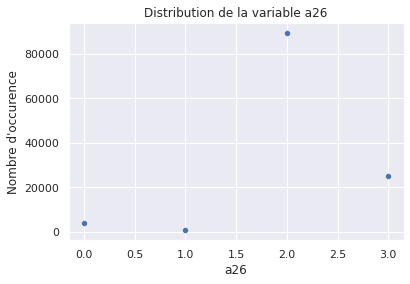

In [84]:
x=list(a26_frequency.keys())
y= list(a26_frequency.values())
plt.title("Distribution de la variable a26")
plt.ylabel("Nombre d'occurence")
plt.xlabel("a26")
sns.scatterplot(x=x,y=y)
plt.show

**On remarque que la classe majoritaire est la classe 2 suivie par la classe 3 puis la classe 0, et la moins frequente c'est la classe 1**

**Applied Classifier**

In [85]:
dtc26 = tree.DecisionTreeClassifier()
gnb26 = GaussianNB()
rfc26 = RandomForestClassifier()
sgd26 = SGDClassifier()
lr26 = LogisticRegression(max_iter=10000)
knn26 = KNeighborsClassifier()
per26 = Perceptron(random_state=0)
methods26 = [gnb26, dtc26, sgd26, knn26, lr26, rfc26,per26]

In [86]:
X1 , y1 = scaled_data_copy.loc[:,cp_col1] , scaled_data_copy['a26']

In [87]:
X1_train , X1_test , y1_train , y1_test = train_test_split(X1,y1,test_size=0.33)

In [88]:
X1_train , y1_train = X1_train.to_numpy() , y1_train.to_numpy()

### Report du temps d’exécution pour l’apprentissage et l’application des modèles

In [89]:

all_times26 = []
for clf in tqdm(methods26):
    temps = []   
    for s in sizes : 
        X_train_s , y_train_s = np.array(random.choices(X1_train , k=s)) , np.array(random.choices(y1_train , k=s))
        res = %timeit -o -q -r1 -n1 clf.fit(X_train_s,y_train_s)
        l = clf.__class__.__name__
        temps.append(res.average)
    all_times26.append((temps,l))

100%|██████████| 7/7 [00:55<00:00,  7.91s/it]


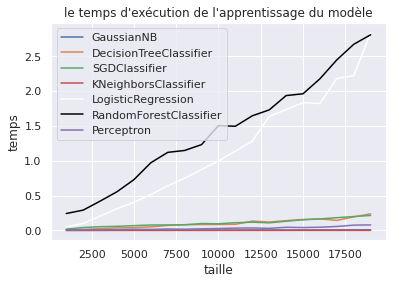

In [90]:
for times in all_times26:
    tmp, lab = times
    if lab == 'RandomForestClassifier':
        plt.plot(sizes,tmp, label=lab,color='black')
    elif  lab == 'LogisticRegression':
        plt.plot(sizes,tmp, label=lab,color='white')
    else:
        plt.plot(sizes,tmp, label=lab)

plt.title("le temps d'exécution de l'apprentissage du modèle")
plt.xlabel('taille')
plt.ylabel('temps')
plt.legend()
plt.show()

**On remarque que le temps de l'entrainement du classifieur RandomForestClassifier est un peu trop elevé comparativement avec les autres classifieur, ce qui est normal vue que l'algoritme doit créer un nombre très grand d'arbres . 
On remarque aussi que le classifieur LogisticRegression prend aussi du temps pour s'entraîner sur les données. Cela dû aux ressources de notre machines.**

In [91]:
X1_test , y1_test = X1_test.to_numpy() , y1_test.to_numpy()

In [92]:
all_times26p = []

for clf in tqdm(methods26):
    l = clf.__class__.__name__
    temps = []   
    for s in sizes :
        X_test_s  = np.array(random.choices(X1_test , k=s)) 
        res = %timeit -o -q -r1 -n1 clf.predict(X_test_s)
        temps.append(res.average)
    all_times26p.append((temps, l))

100%|██████████| 7/7 [01:14<00:00, 10.61s/it]


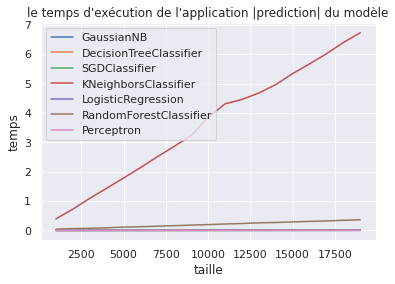

In [93]:
for times in all_times26p:
    tmp, lab = times
    plt.plot(sizes,tmp, label=lab)

plt.title("le temps d'exécution de l'application |prediction| du modèle")
plt.xlabel('taille')
plt.ylabel('temps')
plt.legend()
plt.show()

***On remarque que le temps de prédiction du classifieur KNN est un peu trop elevé comparativement avec les autres classifieur, ce qui est normal vue que l'algoritme doit trouver les voisins les plus proches dans l'ensemble d'apprentissage et vue que notre echantillon a plusieurs caracteristique (dimensionnalité) le knn mets du temps***

In [94]:
X1_test.shape , y1_test.shape

((39399, 30), (39399,))

In [95]:
scores26 = dict()
for clf in tqdm(methods26):
    l = clf.__class__.__name__
    scores26[l] = []
    for s in sizes :
        X_test_s , y_test_s = X1_test[:s+1], y1_test[:s+1]
        s = clf.score(X_test_s,y_test_s)
        scores26[l].append(s)

100%|██████████| 7/7 [01:12<00:00, 10.30s/it]


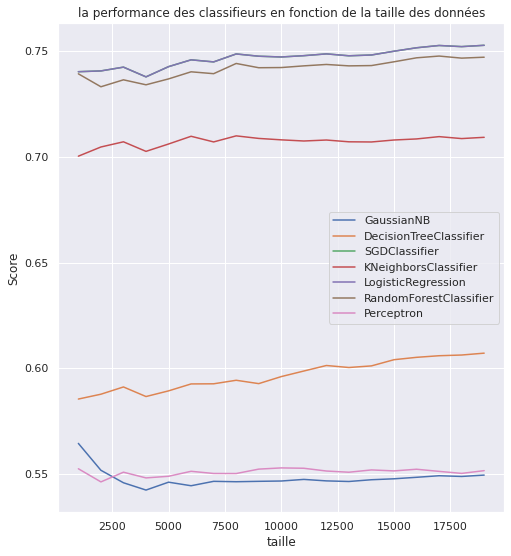

In [96]:
plt.figure(figsize=(8, 
                    9))
for s in scores26:
    tmp, lab = scores26[s] ,s
    plt.plot(sizes,tmp, label=lab)

plt.title("la performance des classifieurs en fonction de la taille des données")
plt.xlabel('taille')
plt.ylabel('Score')
plt.legend()
plt.show()

### On remarque que pour certains classifieurs , plus les données sont grandes plus la performance augmente , pour d'autres , plus les données augmentent , la performance diminue . On peut conclure , à partir de cela qu'on ne peut pas décider de la performance d'un classifieur en fonction de la taille des données.  Donc on peut conclure que ça dépend de la nature de l'application sur laquelle on travaille.

# Estimation de l'erreur (generalisation)

***Afin d'estimer l'erreur en general, il faut decouper l'echantillon de données train initial en une partie d'apprentissage (train) et une partie de validation valid, et on estime l'erreur sur la partie validation***

In [97]:
from sklearn.model_selection import KFold
kf = KFold()

In [98]:
res={}
for methode in methods26:
    for train_idx, test_idx in kf.split(X1_train):
        methode.fit(X1_train[train_idx],y1_train[train_idx])
        res[methode] = np.average(methode.score(X1_train[test_idx],y1_train[test_idx]))
for elt in res.keys():
    print("modele : ",elt,"scores : ", res[elt])

modele :  GaussianNB() scores :  0.2474059257407176
modele :  DecisionTreeClassifier() scores :  0.9137392174021752
modele :  SGDClassifier() scores :  0.8422302787848481
modele :  KNeighborsClassifier() scores :  0.8991748968621077
modele :  LogisticRegression(max_iter=10000) scores :  0.8350418802350293
modele :  RandomForestClassifier() scores :  0.9483060382547819
modele :  Perceptron() scores :  0.783785473184148


**On remarque que RandomForestClassifier qui a le score le plus elevé donc si on veut choisir lequelle des classifieurs a mettre en place en production on va opter pour RandomForestClassifier vue son comportement est bel et bien meilleur que les autres dans notre echantillon a predir**

## Sélection des bons hyperparamètres 

### Perceptron

In [99]:
params_per = {
    'penalty' : ['l2','l1','elasticnet'],
    'alpha': [0.0001,0.001,0.01,0.1 ],
    'fit_intercept': [False,True],
    'shuffle' : [True,False],
}
halving_per = HalvingGridSearchCV(per26, params_per,  n_jobs=-1, min_resources="exhaust", factor=3)
halving_per.fit(X1_train, y1_train)


HalvingGridSearchCV(estimator=Perceptron(), n_jobs=-1,
                    param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                'fit_intercept': [False, True],
                                'penalty': ['l2', 'l1', 'elasticnet'],
                                'shuffle': [True, False]},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [100]:
halving_per.best_score_

0.7828593553154487

In [101]:
halving_per.best_params_

{'alpha': 0.0001, 'fit_intercept': True, 'penalty': 'l1', 'shuffle': False}

In [102]:
halving_per.best_estimator_.score(X1_test,y1_test)

0.8040305591512475

### DecisionTreeClassifier

In [103]:
#X26 , y26 = scaled_data.loc[:,cp_col1] , scaled_data['a26']
#X26_train , X26_test , y26_train , y26_test = train_test_split(X26,y26,test_size=0.33)
#X26_train , X26_test , y26_train , y26_test = X26_train.to_numpy() , X26_test.to_numpy() , y26_train.to_numpy() , y26_test.to_numpy()

In [104]:
#X26_train , X26_test , y26_train , y26_test = X26_train.to_numpy() , X26_test.to_numpy() , y26_train.to_numpy() , y26_test.to_numpy()

In [105]:
params = {'max_depth': range(2,35), 'criterion': ["gini", "entropy"], 'max_features': range(1,31)}
halving_dtc = HalvingGridSearchCV(dtc26, params,  n_jobs=-1, min_resources="exhaust", factor=3)
halving_dtc.fit(X1_train, y1_train)

HalvingGridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': range(2, 35),
                                'max_features': range(1, 31)},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [106]:
halving_dtc.best_score_

0.9161213189025925

In [107]:
halving_dtc.best_params_

{'criterion': 'gini', 'max_depth': 12, 'max_features': 23}

### Sélection des bons hyperparamètres de NaiveBayes

In [108]:
params_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [109]:
halving_gnb = HalvingGridSearchCV(gnb26, params_gnb, n_jobs=-1, min_resources="exhaust", factor=3)
halving_gnb.fit(X1_train, y1_train)

HalvingGridSearchCV(estimator=GaussianNB(), n_jobs=-1,
                    param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [110]:
halving_gnb.best_params_

{'var_smoothing': 0.2848035868435802}

In [111]:
halving_gnb.best_score_

0.7685687826891308

### Sélection des bons hyperparamètres de Logistic Régression

In [112]:
halving_lr = HalvingGridSearchCV(lr26, param_grid=params_lr,n_jobs=-1, min_resources="exhaust", factor=3)
halving_lr.fit(X1_train, y1_train)

HalvingGridSearchCV(estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
                    param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                                'penalty': ['l2'],
                                'solver': ['lbfgs', 'newton-cg', 'liblinear',
                                           'sag', 'saga']},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [113]:
halving_lr.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [114]:
halving_lr.best_score_

0.83798649699932

### Sélection des bons hyperparamètres de SGDClassifier

In [115]:
halving_sgd = HalvingGridSearchCV(sgd26, param_grid=params_sgd, n_jobs=-1, min_resources="exhaust", factor=3)
halving_sgd.fit(X1_train, y1_train)

HalvingGridSearchCV(estimator=SGDClassifier(), n_jobs=-1,
                    param_grid={'alpha': array([1.00000000e-04, 1.38949549e-03, 1.93069773e-02, 2.68269580e-01,
       3.72759372e+00, 5.17947468e+01, 7.19685673e+02, 1.00000000e+04]),
                                'eta0': [0.0001],
                                'learning_rate': ['constant', 'optimal',
                                                  'invscaling', 'adaptive'],
                                'loss': ['hinge', 'log', 'modified_huber',
                                         'squared_hinge', 'perceptron'],
                                'penalty': ['l2', 'l1', 'elasticnet']},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [116]:
halving_sgd.best_params_

{'alpha': 0.0001,
 'eta0': 0.0001,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'penalty': 'l1'}

In [117]:
halving_sgd.best_score_

0.8406139087445699

### Sélection des bons hyperparamètres de KNN

In [118]:
halving_knn=HalvingGridSearchCV(knn26, param_grid=params_knn, factor=3)
halving_knn.fit(X1_train, y1_train)

HalvingGridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={'metric': ['euclidean', 'manhattan',
                                           'minkowski'],
                                'n_neighbors': range(1, 21, 2),
                                'weights': ['uniform', 'distance']},
                    refit=<function _refit_callable at 0x7f13db39bb70>)

In [119]:
halving_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [120]:
halving_knn.best_score_

0.9300371407642979

## Feautures Selection

**On va utiliser la methode proposée par sklearn mutual_info_classif**

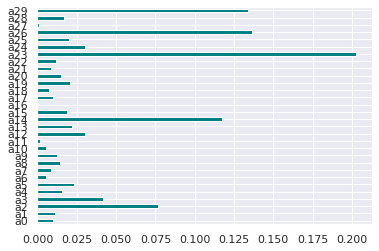

In [121]:
importances = mutual_info_classif(X1,y1)
feat_importances = pd.Series(importances,scaled_data_copy.columns[0:len(scaled_data_copy.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [122]:
feat_importances = feat_importances.drop("a26")

In [123]:
dic_feat = feat_importances.to_dict()
dic_feat

{'a0': 0.010182400953003823,
 'a1': 0.011159594861647193,
 'a2': 0.0763518131199501,
 'a3': 0.04182083225175304,
 'a4': 0.015341941334827025,
 'a5': 0.023061130232569615,
 'a6': 0.005159670012592432,
 'a7': 0.008302807218672825,
 'a8': 0.014294833720087219,
 'a9': 0.012241599070497822,
 'a10': 0.005371672958355722,
 'a11': 0.001531812614359307,
 'a12': 0.030314712486188444,
 'a13': 0.02188753647913355,
 'a14': 0.1172148835438589,
 'a15': 0.01886053494261053,
 'a16': 0.0006545342930888154,
 'a17': 0.01007260537575183,
 'a18': 0.0072301574590447615,
 'a19': 0.02076160525473081,
 'a20': 0.015017229174621338,
 'a21': 0.00878551588800014,
 'a22': 0.011943727460514308,
 'a23': 0.20276847500532713,
 'a24': 0.030528898703407137,
 'a25': 0.019925581402590486,
 'a27': 0.0012049178476050137,
 'a28': 0.016612104381648285,
 'a29': 0.13362215068552663}

**On va garder que les attribut avec une correlation mutuelle superieur ou egale a 0.025**

In [124]:
cp_dic_feat = dic_feat.copy()
for c in dic_feat:
    if dic_feat[c] < 0.025:
        del cp_dic_feat[c]
        

In [125]:
cp_dic_feat

{'a2': 0.0763518131199501,
 'a3': 0.04182083225175304,
 'a12': 0.030314712486188444,
 'a14': 0.1172148835438589,
 'a23': 0.20276847500532713,
 'a24': 0.030528898703407137,
 'a29': 0.13362215068552663}

In [126]:
X26_red = X[list(cp_dic_feat.keys())]

In [127]:
Xred26_train , Xred_test26 , y_train26 , y_test26 = train_test_split(X26_red,y1,test_size=0.33)

In [128]:
Xred26_train , Xred_test26 , y_train26 , y_test26 = Xred26_train.to_numpy() , Xred_test26.to_numpy() , y_train26.to_numpy() , y_test26.to_numpy()

### Nous avons choisi 0.025 comme seuil de sélection des attributs pour réduire la dimension de nos données . Donc les attributs conservés ont une forte connexion avec la cible selon cette méthode.

In [129]:
for clasifier in methods26:
    c = clasifier.__class__.__name__
    clasifier.fit(X1_train,y1_train)
    s = clasifier.score(X1_test,y1_test)
    print('Score Avant reduction de {} {}'.format(c,s))
    clasifier.fit(Xred26_train,y_train26)
    s= clasifier.score(Xred_test26,y_test26)
    print('Score Apres reduction de {} {}'.format(c ,s))
    print("\n")

Score Avant reduction de GaussianNB 0.24325490494682606
Score Apres reduction de GaussianNB 0.7203228508337776


Score Avant reduction de DecisionTreeClassifier 0.9232467829132719
Score Apres reduction de DecisionTreeClassifier 0.920683266072743


Score Avant reduction de SGDClassifier 0.8331937358816214
Score Apres reduction de SGDClassifier 0.7511865783395517


Score Avant reduction de KNeighborsClassifier 0.9017233939947714
Score Apres reduction de KNeighborsClassifier 0.9078149191603848


Score Avant reduction de LogisticRegression 0.8355795832381533
Score Apres reduction de LogisticRegression 0.7544861544709257


Score Avant reduction de RandomForestClassifier 0.9495164851899794
Score Apres reduction de RandomForestClassifier 0.927079367496637


Score Avant reduction de Perceptron 0.8126856011573897
Score Apres reduction de Perceptron 0.7521764511789639




### Pour certains classifieurs , la performance a augmenté après la réduction de dimensions , pour d'autres , le score a baissé .Même si pour certains classifieur le score s'est un peu dégradé , le temps d'exécution a diminué.